In [38]:
from cgeniepy.ecology import EcoModel
import xarray as xr
import numpy as np
from cgeniepy.array import GriddedData
GriddedData.modify_in_place=False
## plot pft richness maps
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
arc_mask = xr.load_dataarray("../masked_array.nc")

def mask_arctic(input_data):
    "apply the new land-sea mask to the data"
    input_data = input_data * arc_mask
    return input_data

exp3 = EcoModel("../model/muffin.u067bc.PO4.EXP3", gemflag=['biogem', 'ecogem'])

In [39]:
chl_c = exp3.get_var("eco2D_Plankton_Chl_Total")/(exp3.get_var("eco2D_Plankton_C_Total")*12.01)

## adding the name
chl_c.attrs['long_name'] = 'Chl:C'
chl_c.attrs['units'] = 'mg/mg'

chl_c = mask_arctic(chl_c)

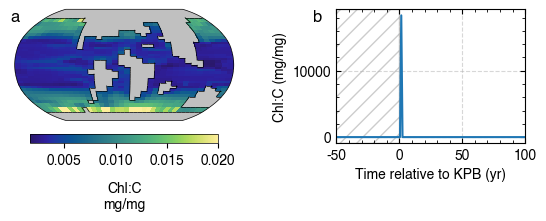

In [40]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from cmap import Colormap
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
cmap = Colormap( 'cmocean:haline').to_mpl()

# Create figure with a grid layout
fig = plt.figure(figsize=(7, 3))
gs = fig.add_gridspec(2, 2, height_ratios=[2, 1], width_ratios=[1.5, 1], hspace=0.3, wspace=0.3)

# Add Cartopy map to the left subplot
ax_map = fig.add_subplot(gs[0, 0], projection=ccrs.Robinson())
chl_c_map = chl_c.isel(time=0).to_GriddedDataVis()
chl_c_map.aes_dict['colorbar_kwargs'] = {'fraction': 0.07, 'pad': 0.1}
chl_c_map.plot(ax=ax_map, colorbar=True, cmap=cmap, outline=True,vmax=.02)

# Add line plot to the right subplot
ax_line = fig.add_subplot(gs[0, 1])
chl_c.median(dim=['lat','lon']).plot(ax=ax_line)

ax_line.set_xticks(np.arange(0,201,50))
ax_line.set_xticklabels(np.arange(-100,101,50))
ax_line.set_xlabel('Time relative to KPB (yr)')
ax_line.axvspan(10, 100, facecolor='none', edgecolor='black', hatch='//', alpha=0.2) 
ax_line.set_xlim(50,200)

ax_map.text(0, 1.0, 'a', transform=ax_map.transAxes, fontsize=12, fontweight='bold', va='top', ha='center')
ax_line.text(-0.1, 1.0, 'b', transform=ax_line.transAxes, fontsize=12, fontweight='bold', va='top', ha='center')

fig.savefig('../output/fig3.png', dpi=300, bbox_inches='tight')